In [30]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from pandas.tools.plotting import parallel_coordinates

pd.options.display.max_columns = 120

%matplotlib inline

In [21]:
dir_name = "../Dota2Dataset"
dota_train = pd.read_csv(os.path.join(dir_name, 'dota2Train.csv'), header=None)
dota_test = pd.read_csv(os.path.join(dir_name, 'dota2Train.csv'), header=None)

In [3]:
dota_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116
0,-1,223,2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,-1,0,0,0,-1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1,0,0,0,0,1,1,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,0,0,-1,0,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


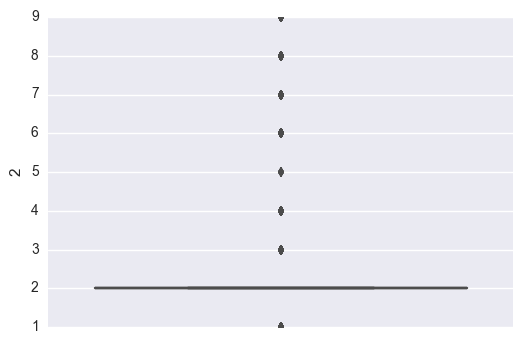

In [44]:
sns.boxplot(x=X_train.iloc[:, 0], color=".5", orient="v")

In [34]:
hero_df = dota_train.iloc[:, 4:]
pick_hero = hero_df.replace(-1, 0)
ban_hero = hero_df.replace(1, 0)
ban_hero = ban_hero.replace(-1, 1)

In [35]:
pick_hero.sum().head()

4     7411
5    10087
6     1294
7     5814
8     4932
dtype: int64

In [36]:
ban_hero.sum().head()

4     7562
5    10177
6     1230
7     5888
8     5118
dtype: int64

# 英雄的出场次数分布

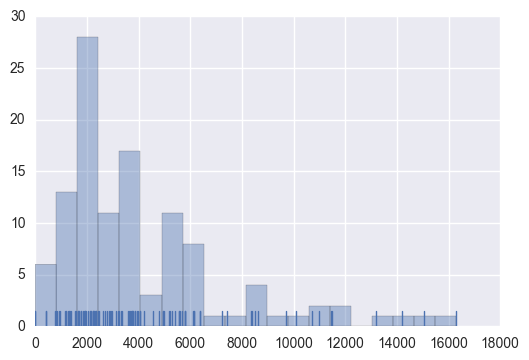

In [37]:
sns.distplot(pick_hero.sum(), bins=20, kde=False, rug=True)

# 英雄被禁次数分布

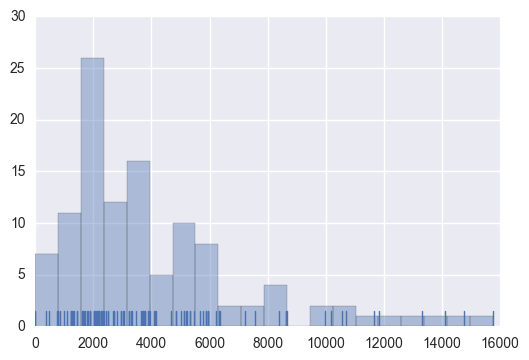

In [38]:
sns.distplot(ban_hero.sum(), kde=False, rug=True, bins=20)

# 出场英雄的条形图

<Container object of 113 artists>

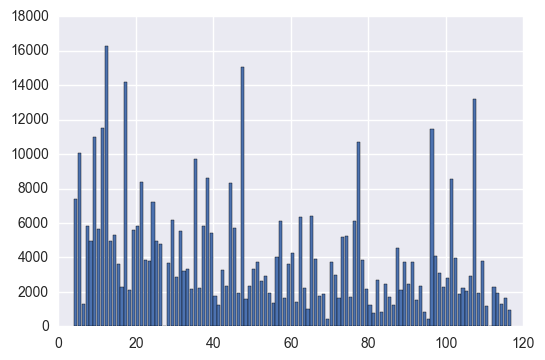

In [39]:
plt.bar(pick_hero.columns, pick_hero.sum())

<Container object of 113 artists>

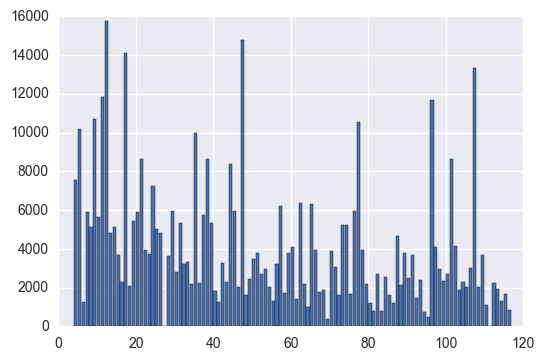

In [40]:
plt.bar(ban_hero.columns, ban_hero.sum())

In [41]:
X_train = dota_train.iloc[:, 2:]
y_train = dota_train.iloc[:, 0]
X_test = dota_test.iloc[:, 2:]
y_test = dota_test.iloc[:, 0]

In [42]:
clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.058509319030980556

In [43]:
random_clf = RandomForestClassifier(n_estimators=30)
random_clf.fit(X_train, y_train)
print(random_clf.score(X_test, y_test))

0.999870480302


## 两个英雄的重要性特别低从上面看出这两个英雄，没有被pick和ban过

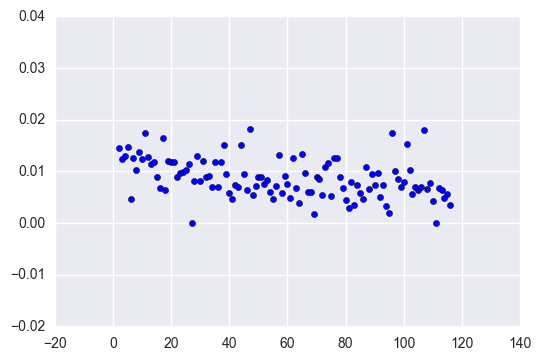

In [11]:
plt.scatter(X_train.columns, random_clf.feature_importances_)

In [33]:
dota_train.columns = [str(i) for i in range(117)]

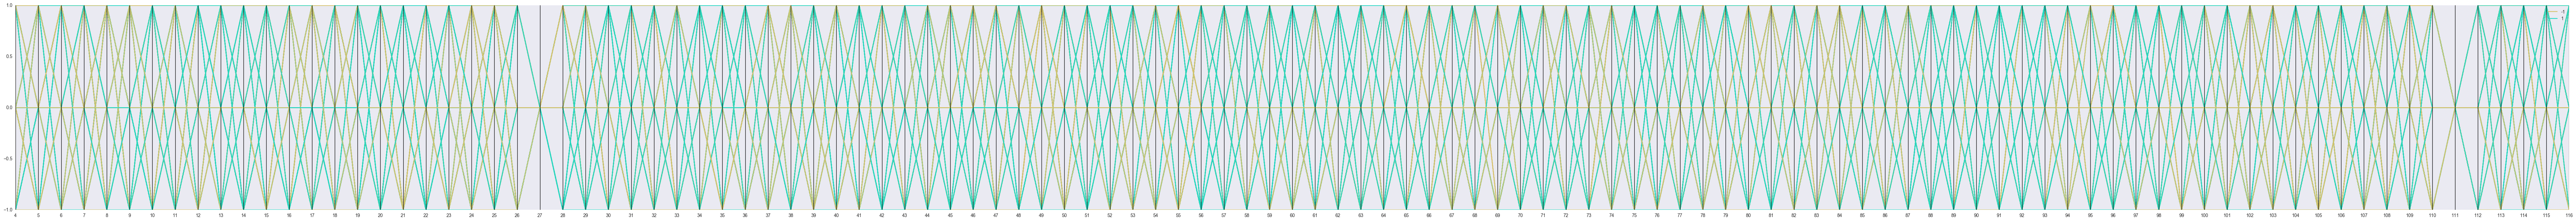

In [29]:
fig = plt.figure(figsize=(100, 8))
parallel_coordinates(dota_train.loc[:, [str(0)] + [str(i) for i in range(4, 117)]], '0')